In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.cluster import KMeans

In [2]:
# Loading the data

Emp_data = pd.read_csv('HR_comma_sep.csv')

In [3]:
Emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
Emp_data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
Emp_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Checking for null values

Emp_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

## Understanding the data

<Axes: >

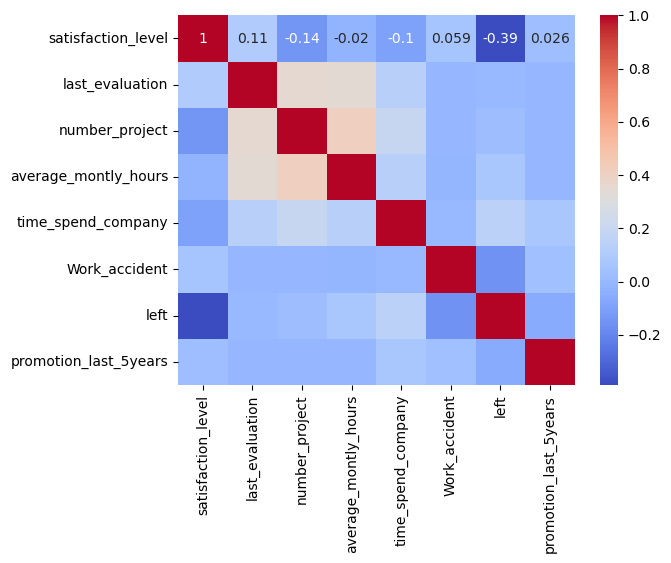

In [8]:
# Heat map

corr = Emp_data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')

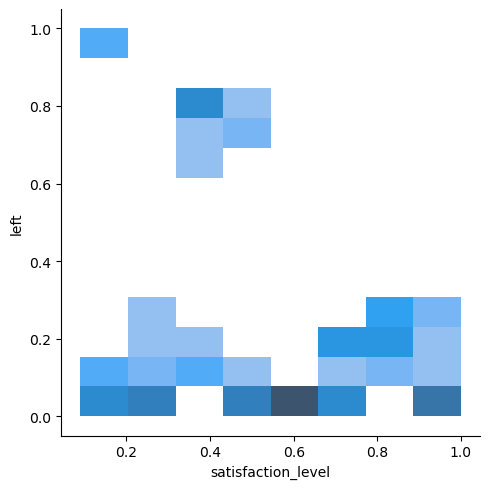

In [9]:
# Distribution plot 

df_satisfaction_level=Emp_data[['satisfaction_level', 'left']].groupby(['satisfaction_level'], as_index=False).mean().sort_values(by='left', ascending=False)
sns.displot(data=df_satisfaction_level,x="satisfaction_level",y="left",kind='hist')

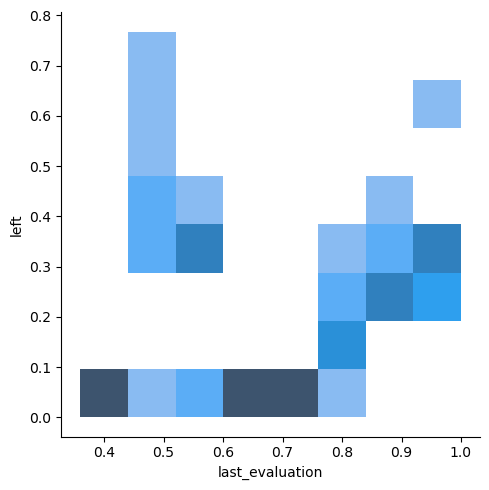

In [24]:
df_emp_evaluation=Emp_data[['last_evaluation', 'left']].groupby(['last_evaluation'], as_index=False).mean().sort_values(by='left', ascending=False)
sns.displot(data=df_emp_evaluation,x="last_evaluation",y="left",kind='hist')


<Axes: xlabel='left', ylabel='Count'>

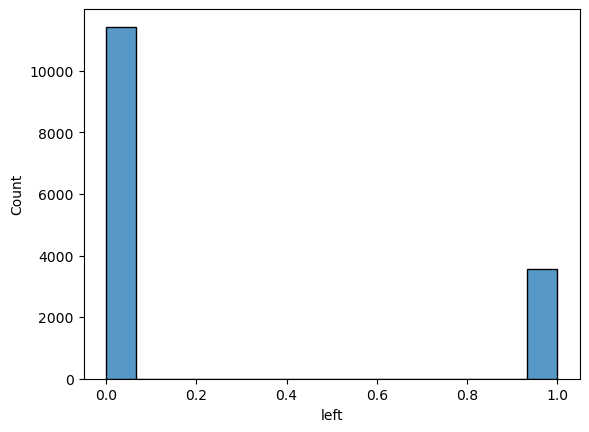

In [26]:
sns.histplot(Emp_data["left"])

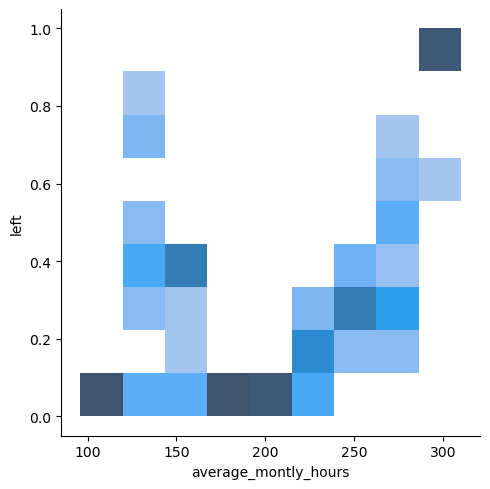

In [27]:
df_avg_monthly_hours=Emp_data[['average_montly_hours', 'left']].groupby(['average_montly_hours'], as_index=False).mean().sort_values(by='average_montly_hours')
sns.displot(data=df_avg_monthly_hours,x="average_montly_hours",y="left",kind='hist')

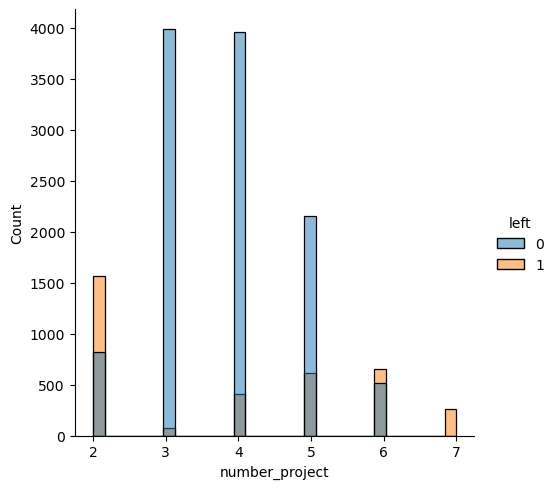

In [29]:
sns.displot(data=Emp_data,x="number_project",kind="hist",hue="left")

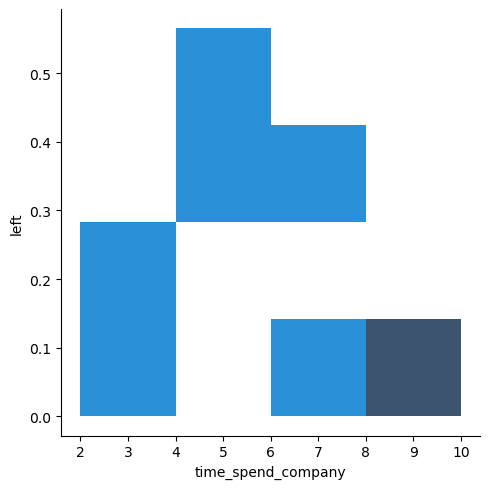

In [22]:
df_avg_monthly_hours=Emp_data[['time_spend_company', 'left']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='time_spend_company')
sns.displot(data=df_avg_monthly_hours,x="time_spend_company",y="left",kind='hist')

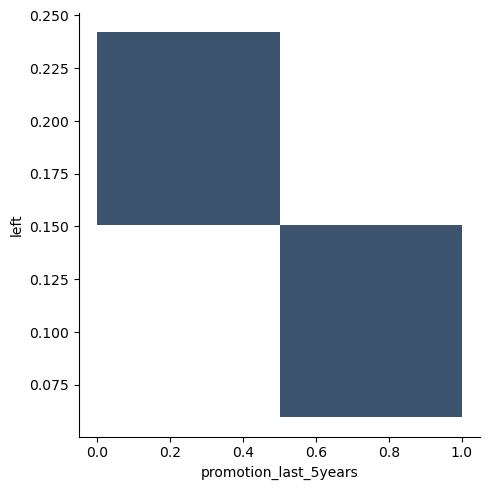

In [9]:
df_avg_monthly_hours=Emp_data[['promotion_last_5years', 'left']].groupby(['promotion_last_5years'], as_index=False).mean().sort_values(by='promotion_last_5years')
sns.displot(data=df_avg_monthly_hours,x="promotion_last_5years",y="left",kind='hist')

In [ ]:
Inference:
Employees who have not received promotion in the last five years are more likely to leave the company.

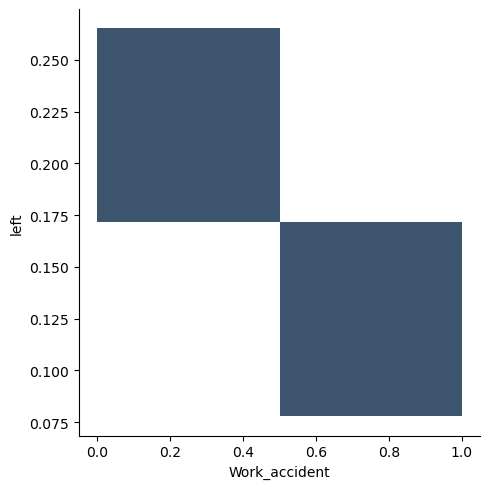

In [18]:
df_avg_monthly_hours=Emp_data[['Work_accident', 'left']].groupby(['Work_accident'], as_index=False).mean().sort_values(by='Work_accident')
sns.displot(data=df_avg_monthly_hours,x="Work_accident",y="left",kind='hist')

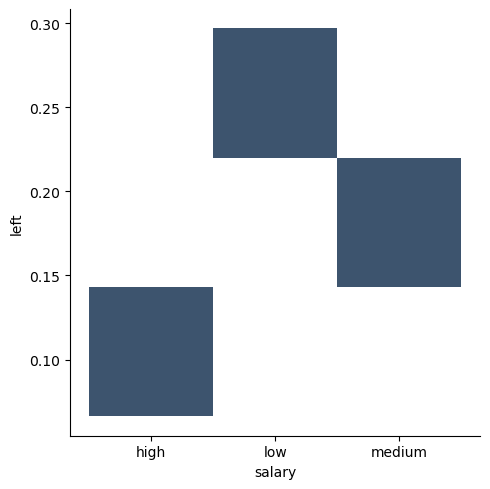

In [15]:
df_avg_monthly_hours=Emp_data[['salary', 'left']].groupby(['salary'], as_index=False).mean().sort_values(by='salary')
sns.displot(data=df_avg_monthly_hours,x="salary",y="left",kind='hist')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

<Figure size 800x1000 with 0 Axes>

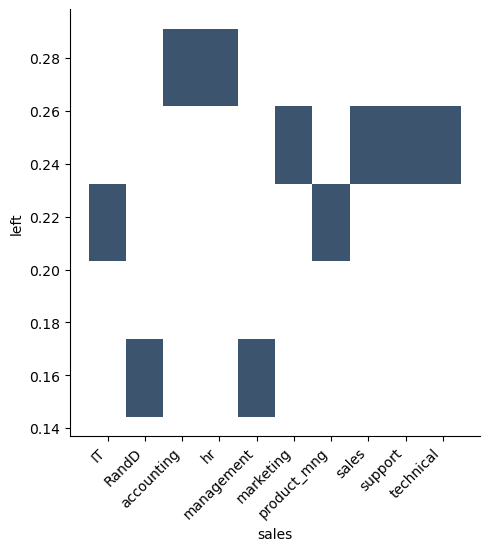

In [14]:
plt.figure(figsize=(8,10))
df_avg_monthly_hours=Emp_data[['sales', 'left']].groupby(['sales'], as_index=False).mean().sort_values(by='sales')
sns.displot(data=df_avg_monthly_hours,x="sales",y="left",kind='hist')
plt.xticks(rotation=45,ha='right')

In [ ]:
Employees from RandD and management has a less tendency to leave the company while employees in accounting and hr shows a higher density, indicating
that they have a higher tendency to leave the company.

In [10]:
# Label Encoding

categorical_col =['sales','salary']
le = LabelEncoder()
for col in categorical_col:
    Emp_data[col]=le.fit_transform(Emp_data[col])

In [11]:
y = Emp_data['left']
X =Emp_data.drop(['left','Work_accident','sales'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [12]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary
3553,0.31,0.64,6,183,2,0,1
2112,0.59,0.81,4,200,2,0,1
1794,0.38,0.51,2,159,3,0,1
13885,0.95,0.77,5,199,10,0,2
11250,0.50,0.77,3,265,3,0,2


In [13]:
y_train.value_counts()

left
0    9137
1    2862
Name: count, dtype: int64

In [14]:
X_train.count()

satisfaction_level       11999
last_evaluation          11999
number_project           11999
average_montly_hours     11999
time_spend_company       11999
promotion_last_5years    11999
salary                   11999
dtype: int64

In [15]:
# Upsampling the train data using smote technique

smote = SMOTE(random_state =123)
X_smote_train,y_smote_train = smote.fit_resample(X_train,y_train)

In [16]:
y_smote_train.value_counts()

left
0    9137
1    9137
Name: count, dtype: int64

In [17]:
X_smote_train.count()

satisfaction_level       18274
last_evaluation          18274
number_project           18274
average_montly_hours     18274
time_spend_company       18274
promotion_last_5years    18274
salary                   18274
dtype: int64

## Training the Logistic regression model

In [18]:
# Applying a 5-fold CV

model_logistic=LogisticRegression()
#scores = cross_val_score(model_logistic, X_smote_train, y_smote_train, cv=5, scoring='accuracy')
# Defining the parameters for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_logistic, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)


In [19]:


# Fitting the train data

model_logistic.fit(X_smote_train, y_smote_train)

# Predicting the output

y_pred_logistic = model_logistic.predict(X_test)



[[1679  612]
 [ 181  528]]


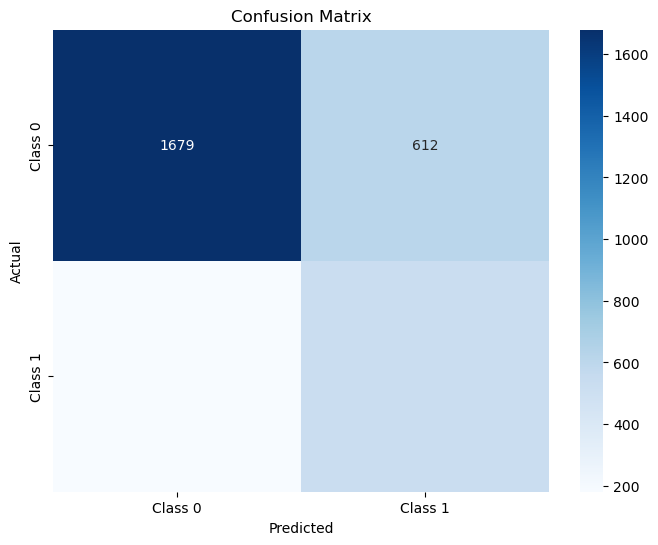

In [20]:
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(conf_matrix_logistic)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic,annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
class_report_logistic = classification_report(y_test, y_pred_logistic)
print('\nClassification Report:')
print(class_report_logistic)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      2291
           1       0.46      0.74      0.57       709

    accuracy                           0.74      3000
   macro avg       0.68      0.74      0.69      3000
weighted avg       0.80      0.74      0.75      3000



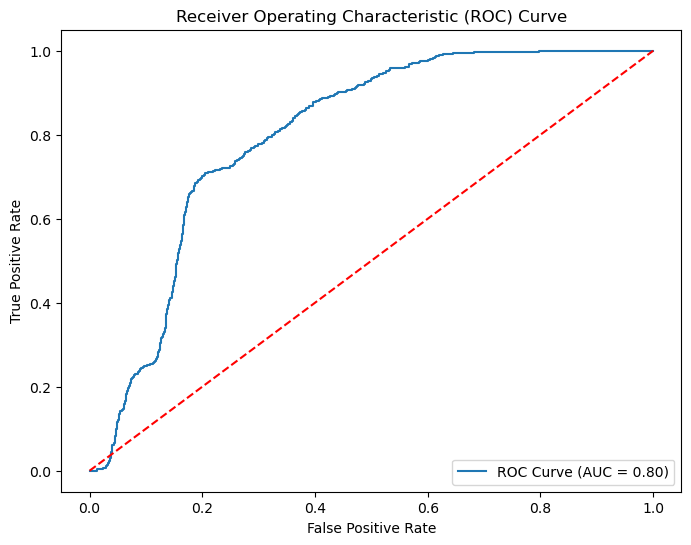

In [22]:
# ROC/AUC Curve
proba_logistic = model_logistic.predict_proba(X_test)
proba_class1 = proba_logistic[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Training a Random Forest Classifier Model

In [23]:
# Apply a 5-fold Random search CV

# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
model_rf = RandomForestClassifier()

model_rf_grid = RandomizedSearchCV(estimator = model_rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [24]:

model_rf_grid.fit(X_smote_train,y_smote_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [25]:
model_rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 1.0,
 'max_depth': None,
 'bootstrap': True}

In [26]:
model_rf_grid.best_score_

0.9735143691264263

In [27]:
y_pred_rf=model_rf_grid.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9856666666666667

[[2269   22]
 [  21  688]]


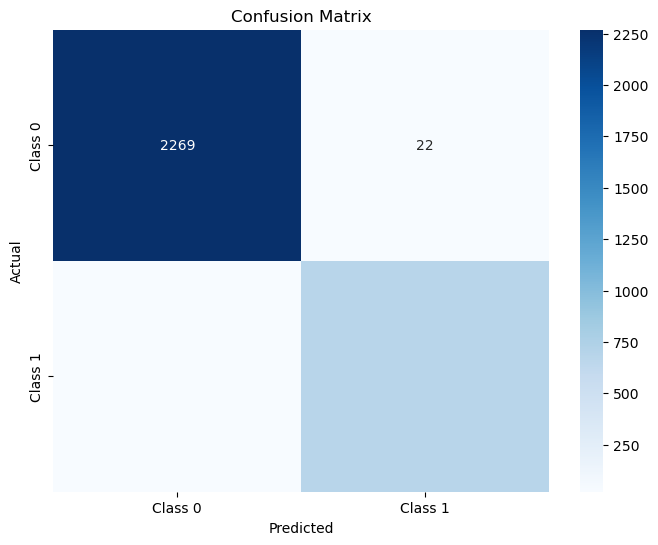

In [28]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf,annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

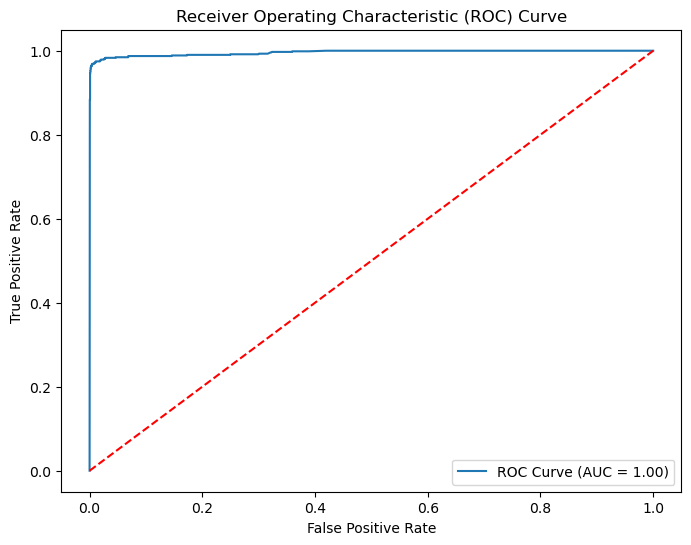

In [29]:
# ROC/AUC Curve
proba_rf = model_rf_grid.predict_proba(X_test)
proba_class1 = proba_rf[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Training a Gradient Boost Classifier

In [30]:
model_gb = GradientBoostingClassifier(max_depth=8, n_estimators= 120, learning_rate= 0.5, random_state=123)
model_gb.fit(X_smote_train,y_smote_train)
y_pred_gb = model_gb.predict(X_test)
accuracy_score(y_test,y_pred_gb)

0.9906666666666667

In [31]:
# Random Search CV

n_estimators = [20,60,100,120]
max_depth = [1,2,8]
learning_rate=[0.1,0.25,0.5]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'learning_rate':learning_rate
             }
gb = GradientBoostingClassifier()

model_gb_grid = RandomizedSearchCV(estimator = gb, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [33]:
model_gb_grid.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.25, 0.5],
                                        'max_depth': [1, 2, 8],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)>

In [34]:
y_pred_gb = model_gb_grid.fit(X_smote_train,y_smote_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [35]:
y_pred_gb=model_gb_grid.predict(X_test)
accuracy_score(y_test,y_pred_gb)

0.9846666666666667

[[2264   27]
 [  19  690]]


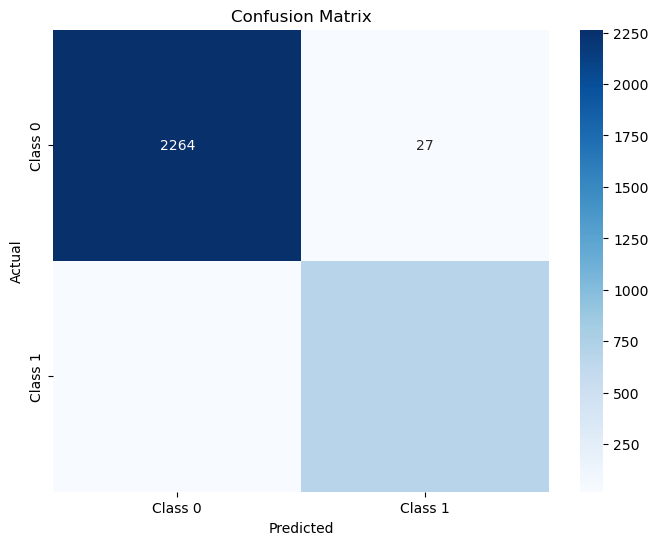

In [36]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_gb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb,annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

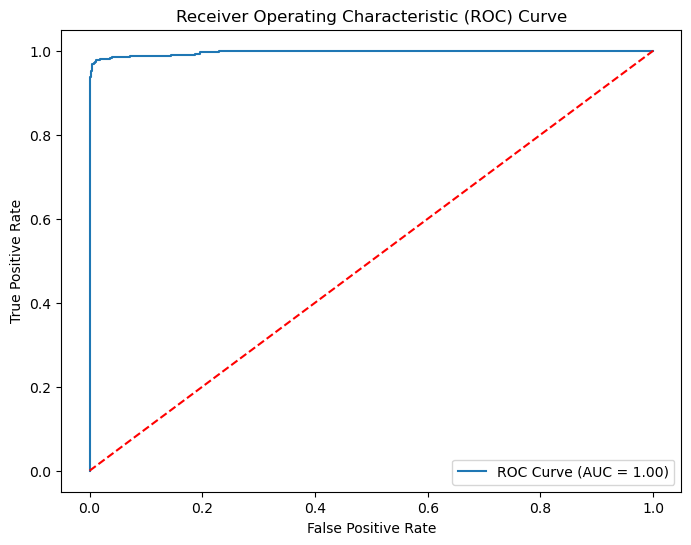

In [37]:
# ROC/AUC Curve
proba_gb = model_gb_grid.predict_proba(X_test)
proba_class1 = proba_gb[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

## Clustering

In [38]:
#X_clust = Emp_data.iloc[:, [0, 1,6]].where (Emp_data['left'] ==1)
X_clust = Emp_data.loc[Emp_data['left'] ==1 ,['satisfaction_level','last_evaluation']].values

In [39]:
X_clust

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

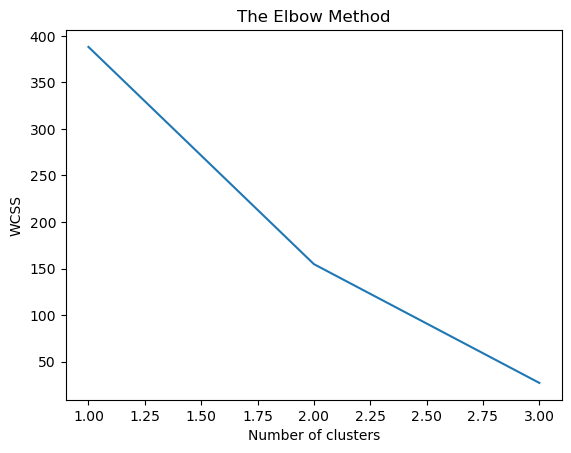

In [40]:
# WCSS Method to find the optimal number of clusters

wcss = []
for i in range(1, 4):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X_clust)
    wcss.append(model.inertia_)
plt.plot(range(1, 4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
model_kmeans= KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = model_kmeans.fit_predict(X_clust)
#Emp_data['Cluster']=y_kmeans

In [42]:
labels = model_kmeans.labels_
np.unique(labels)

array([0, 1, 2])

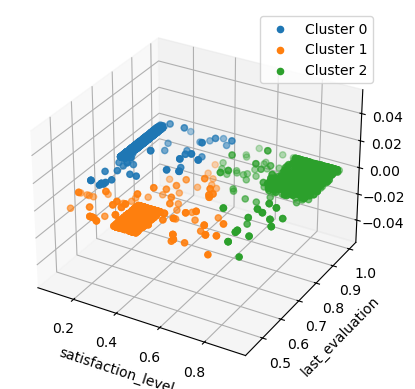

In [43]:
# Plotting the clusters

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster in np.unique(labels):
    ax.scatter(X_clust[labels == cluster, 0], X_clust[labels == cluster, 1], label=f'Cluster {cluster}')
ax.set_xlabel('satisfaction_level')
ax.set_ylabel('last_evaluation')

ax.legend()

plt.show()


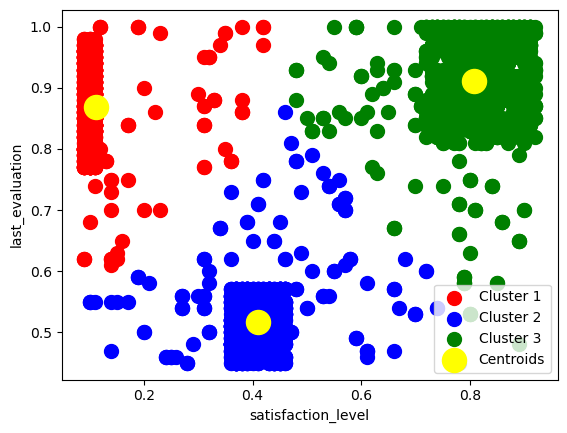

In [44]:
# Plotting the clusters
plt.scatter(X_clust[y_kmeans == 0, 0], X_clust[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_clust[y_kmeans == 1, 0], X_clust[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_clust[y_kmeans == 2, 0], X_clust[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()

plt.show()


## Various retention strategies

In [45]:
proba_gb = model_gb_grid.predict_proba(X)

In [46]:
proba_gb.shape

(14999, 2)

In [47]:
proba_gb

array([[2.12207190e-03, 9.97877928e-01],
       [1.51320785e-02, 9.84867921e-01],
       [7.79667442e-04, 9.99220333e-01],
       ...,
       [2.12207190e-03, 9.97877928e-01],
       [4.18796554e-04, 9.99581203e-01],
       [2.12207190e-03, 9.97877928e-01]])

In [48]:
X['Probability_score']=proba_gb[:,1]

In [49]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary,Probability_score
0,0.38,0.53,2,157,3,0,1,0.997878
1,0.80,0.86,5,262,6,0,2,0.984868
2,0.11,0.88,7,272,4,0,2,0.999220
3,0.72,0.87,5,223,5,0,1,0.989170
4,0.37,0.52,2,159,3,0,1,0.997878
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0.997777
14995,0.37,0.48,2,160,3,0,1,0.997878
14996,0.37,0.53,2,143,3,0,1,0.997878
14997,0.11,0.96,6,280,4,0,1,0.999581


In [50]:
SafeZone = X['Probability_score'] < 0.2

In [51]:
SafeZone.value_counts()

Probability_score
True     11327
False     3672
Name: count, dtype: int64

In [52]:
SafeZone = X[X['Probability_score'] < 0.2]

In [53]:
SafeZone

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary,Probability_score
772,0.31,0.77,4,149,3,0,2,0.018156
790,0.23,0.99,4,204,4,0,1,0.114928
948,0.61,0.86,4,196,4,0,1,0.028556
1061,0.34,0.97,6,157,5,0,1,0.019403
1309,0.56,0.75,5,236,2,0,2,0.019509
...,...,...,...,...,...,...,...,...
14207,0.74,0.95,5,266,10,1,0,0.003837
14208,0.85,0.54,3,185,10,1,0,0.000741
14209,0.33,0.65,3,172,10,1,0,0.000603
14210,0.50,0.73,4,180,3,0,1,0.011184


In [54]:
LowRiskZone = X[(X['Probability_score'] > 0.2) & (X['Probability_score'] < 0.6)]

In [55]:
LowRiskZone.shape

(120, 8)

In [56]:
MediumRiskZone = X[(X['Probability_score'] > 0.6) & (X['Probability_score'] < 0.9)]

In [57]:
MediumRiskZone.shape

(116, 8)

In [58]:
HighRiskZone = X[X['Probability_score'] > 0.9]

In [59]:
HighRiskZone.shape

(3436, 8)

In [60]:
X_Zone = X

conditions = [
    (X['Probability_score'] < 0.2),
    (X['Probability_score'] > 0.2) & (X['Probability_score'] < 0.6),
    (X['Probability_score'] > 0.6) & (X['Probability_score'] < 0.9),
    (X['Probability_score'] > 0.9)
]

choices = ['SafeZone', 'LowRiskZone', 'MediumRiskZone', 'HighRiskZone']

X_Zone['Zone'] = np.select(conditions, choices, default='Unknown')

In [61]:
X_Zone

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary,Probability_score,Zone
0,0.38,0.53,2,157,3,0,1,0.997878,HighRiskZone
1,0.80,0.86,5,262,6,0,2,0.984868,HighRiskZone
2,0.11,0.88,7,272,4,0,2,0.999220,HighRiskZone
3,0.72,0.87,5,223,5,0,1,0.989170,HighRiskZone
4,0.37,0.52,2,159,3,0,1,0.997878,HighRiskZone
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0.997777,HighRiskZone
14995,0.37,0.48,2,160,3,0,1,0.997878,HighRiskZone
14996,0.37,0.53,2,143,3,0,1,0.997878,HighRiskZone
14997,0.11,0.96,6,280,4,0,1,0.999581,HighRiskZone


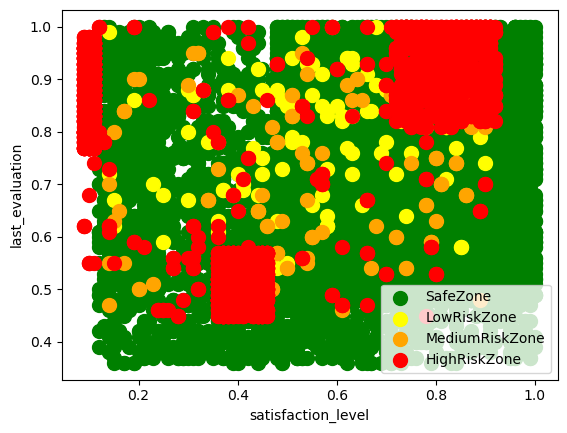

In [62]:
# Plotting the zones

plt.scatter(X_Zone.loc[(X_Zone['Zone'] == 'SafeZone'),['satisfaction_level']] ,X_Zone.loc[(X_Zone['Zone'] == 'SafeZone'),['last_evaluation']], s=100, c='green', label='SafeZone')
plt.scatter(X_Zone.loc[(X_Zone['Zone'] == 'LowRiskZone'),['satisfaction_level']] ,X_Zone.loc[(X_Zone['Zone'] == 'LowRiskZone'),['last_evaluation']], s=100, c='yellow', label='LowRiskZone')
plt.scatter(X_Zone.loc[(X_Zone['Zone'] == 'MediumRiskZone'),['satisfaction_level']] ,X_Zone.loc[(X_Zone['Zone'] == 'MediumRiskZone'),['last_evaluation']], s=100, c='orange', label='MediumRiskZone')
plt.scatter(X_Zone.loc[(X_Zone['Zone'] == 'HighRiskZone'),['satisfaction_level']] ,X_Zone.loc[(X_Zone['Zone'] == 'HighRiskZone'),['last_evaluation']], s=100, c='red', label='HighRiskZone')


plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()

plt.show()